# Data Wrangling
## Final Project
### UFC 
###### How do weight class, gender, age, height and reach, the presence of a crowd, and fighter ranking impact the way in which a UFC fight ends?

In [1]:
import random
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy import stats
from datetime import timedelta
from scipy.stats import norm

import datetime
import sys
from io import StringIO
import statsmodels.api as sm
import warnings
import seaborn as sns

sns.set_style("whitegrid")

## Data Wrangling and Cleaning

In [2]:
ufc_df =  pd.read_csv('/Users/aymanelhattache/Desktop/Minor data science /Data wrangling/UFC Project/ufc-master.csv')
ufc_df.head()

,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,Winner,...,finish_details,finish_round,finish_round_time,total_fight_time_secs,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds
0,Thiago Santos,Johnny Walker,-150.0,130,66.666667,130.000000,2021-10-02,"Las Vegas, Nevada, USA",USA,Red,...,NaN,5.0,5:00,1500.0,800.0,900.0,2000.0,1600.0,-110.0,175.0
1,Alex Oliveira,Niko Price,170.0,-200,170.000000,50.000000,2021-10-02,"Las Vegas, Nevada, USA",USA,Blue,...,NaN,3.0,5:00,900.0,450.0,350.0,700.0,1100.0,550.0,120.0
2,Misha Cirkunov,Krzysztof Jotko,110.0,-130,110.000000,76.923077,2021-10-02,"Las Vegas, Nevada, USA",USA,Blue,...,NaN,3.0,5:00,900.0,550.0,275.0,275.0,1400.0,600.0,185.0
3,Alexander Hernandez,Mike Breeden,-675.0,475,14.814815,475.000000,2021-10-02,"Las Vegas, Nevada, USA",USA,Red,...,Punch,1.0,1:20,80.0,175.0,900.0,500.0,3500.0,110.0,1100.0
4,Joe Solecki,Jared Gordon,-135.0,115,74.074074,115.000000,2021-10-02,"Las Vegas, Nevada, USA",USA,Blue,...,NaN,3.0,5:00,900.0,165.0,200.0,400.0,1200.0,900.0,600.0


In [3]:
ufc_df = ufc_df.drop_duplicates()

In [4]:
ufc_df.isnull().sum()

R_fighter        0
B_fighter        0
R_odds           1
B_odds           0
R_ev             1
              ... 
b_dec_odds     819
r_sub_odds    1049
b_sub_odds    1061
r_ko_odds     1049
b_ko_odds     1062
Length: 119, dtype: int64

In [5]:
ufc_df.describe(include = 'all')

,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,Winner,...,finish_details,finish_round,finish_round_time,total_fight_time_secs,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds
count,4896,4896,4895.000000,4896.000000,4895.000000,4896.000000,4896,4896,4896,4896,...,2102,4274.000000,4274,4274.000000,4093.000000,4077.000000,3847.000000,3835.000000,3847.000000,3834.000000
unique,1348,1591,NaN,NaN,NaN,NaN,428,145,28,2,...,31,NaN,293,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Donald Cerrone,Charles Oliveira,NaN,NaN,NaN,NaN,11/19/2016,"Las Vegas, Nevada, USA",USA,Red,...,Punch,NaN,5:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,24,18,NaN,NaN,NaN,NaN,24,1251,2450,2859,...,507,NaN,2141,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,-117.640449,66.030637,94.827397,167.083323,NaN,NaN,NaN,NaN,...,NaN,2.408049,NaN,652.313758,294.064745,416.544027,843.010138,1064.543155,514.231869,647.257173
std,NaN,NaN,268.881452,247.803928,82.843409,136.944643,NaN,NaN,NaN,NaN,...,NaN,0.996643,NaN,357.911423,230.583958,306.571299,550.126761,627.285034,413.622768,458.846643
min,NaN,NaN,-1700.000000,-1200.000000,5.882353,8.333333,NaN,NaN,NaN,NaN,...,NaN,1.000000,NaN,5.000000,-440.000000,-200.000000,-370.000000,-1250.000000,-550.000000,-275.000000
25%,NaN,NaN,-255.000000,-145.000000,39.215686,68.965517,NaN,NaN,NaN,NaN,...,NaN,1.000000,NaN,297.000000,167.000000,225.000000,435.000000,590.000000,240.000000,325.000000
50%,NaN,NaN,-150.000000,130.000000,66.666667,130.000000,NaN,NaN,NaN,NaN,...,NaN,3.000000,NaN,900.000000,250.000000,349.000000,720.000000,975.000000,435.000000,548.500000
75%,NaN,NaN,126.500000,220.000000,126.500000,220.000000,NaN,NaN,NaN,NaN,...,NaN,3.000000,NaN,900.000000,400.000000,525.000000,1200.000000,1400.000000,700.000000,880.750000


In [6]:
print('Number of total records', ufc_df.shape[0]) 
unique_fighters = len(pd.unique(ufc_df[['R_fighter', 'B_fighter']].values.ravel('K')))
print('----')
print('Number of unique fighters', unique_fighters)

Number of total records 4896
----
Number of unique fighters 1749


In [7]:
columns_to_drop = ufc_df.columns[2:6].tolist() + ufc_df.columns[14:33].tolist() + ufc_df.columns[37:56].tolist() + ufc_df.columns[62:67].tolist() + ufc_df.columns[68:71].tolist() + ufc_df.columns[74:77].tolist() + ufc_df.columns[78:79].tolist() + ufc_df.columns[113:119].tolist() + ufc_df.columns[81:93].tolist() + ufc_df.columns[94:106].tolist()
# Columns we will not use are dropped
ufc_df.drop(columns_to_drop, axis = 1, inplace=True)
ufc_df.head()

,R_fighter,B_fighter,date,location,country,Winner,title_bout,weight_class,gender,no_of_rounds,...,B_match_weightclass_rank,R_match_weightclass_rank,R_Pound-for-Pound_rank,B_Pound-for-Pound_rank,better_rank,finish,finish_details,finish_round,finish_round_time,total_fight_time_secs
0,Thiago Santos,Johnny Walker,2021-10-02,"Las Vegas, Nevada, USA",USA,Red,False,Light Heavyweight,MALE,5,...,10.0,5.0,NaN,NaN,Red,U-DEC,NaN,5.0,5:00,1500.0
1,Alex Oliveira,Niko Price,2021-10-02,"Las Vegas, Nevada, USA",USA,Blue,False,Welterweight,MALE,3,...,NaN,NaN,NaN,NaN,neither,U-DEC,NaN,3.0,5:00,900.0
2,Misha Cirkunov,Krzysztof Jotko,2021-10-02,"Las Vegas, Nevada, USA",USA,Blue,False,Middleweight,MALE,3,...,NaN,NaN,NaN,NaN,neither,S-DEC,NaN,3.0,5:00,900.0
3,Alexander Hernandez,Mike Breeden,2021-10-02,"Las Vegas, Nevada, USA",USA,Red,False,Lightweight,MALE,3,...,NaN,NaN,NaN,NaN,neither,KO/TKO,Punch,1.0,1:20,80.0
4,Joe Solecki,Jared Gordon,2021-10-02,"Las Vegas, Nevada, USA",USA,Blue,False,Lightweight,MALE,3,...,NaN,NaN,NaN,NaN,neither,S-DEC,NaN,3.0,5:00,900.0


In [8]:
ufc_df.groupby(by='gender').mean()

,title_bout,no_of_rounds,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_Height_cms,R_Reach_cms,R_Weight_lbs,R_age,B_age,...,height_dif,reach_dif,age_dif,empty_arena,B_match_weightclass_rank,R_match_weightclass_rank,R_Pound-for-Pound_rank,B_Pound-for-Pound_rank,finish_round,total_fight_time_secs
gender,,,,,,,,,,,,,,,,,,,,,
FEMALE,0.085938,3.207031,165.442305,166.809609,124.296875,166.126914,167.249609,124.921875,29.523438,29.408203,...,-0.684609,-0.747578,-0.216797,0.234375,7.942197,6.756458,8.512195,9.444444,2.592138,728.164619
MALE,0.043796,3.179060,179.561150,184.260933,169.533759,179.421200,184.414897,169.963732,30.119297,29.531250,...,0.100716,-0.193198,0.392792,0.127281,8.340909,6.854305,6.224000,9.500000,2.388673,644.330489


In [9]:
# Per 8,5 male fights there is 1 female fight
Female_fights = ufc_df['gender'].value_counts()['FEMALE']
Male_fights = ufc_df['gender'].value_counts()['MALE']
print(Female_fights)
print(Male_fights)
print(Male_fights/Female_fights)

512
4384
8.5625


In [10]:
men_df = ufc_df[ufc_df['gender'] == 'MALE']
men_df.head()

,R_fighter,B_fighter,date,location,country,Winner,title_bout,weight_class,gender,no_of_rounds,...,B_match_weightclass_rank,R_match_weightclass_rank,R_Pound-for-Pound_rank,B_Pound-for-Pound_rank,better_rank,finish,finish_details,finish_round,finish_round_time,total_fight_time_secs
0,Thiago Santos,Johnny Walker,2021-10-02,"Las Vegas, Nevada, USA",USA,Red,False,Light Heavyweight,MALE,5,...,10.0,5.0,NaN,NaN,Red,U-DEC,NaN,5.0,5:00,1500.0
1,Alex Oliveira,Niko Price,2021-10-02,"Las Vegas, Nevada, USA",USA,Blue,False,Welterweight,MALE,3,...,NaN,NaN,NaN,NaN,neither,U-DEC,NaN,3.0,5:00,900.0
2,Misha Cirkunov,Krzysztof Jotko,2021-10-02,"Las Vegas, Nevada, USA",USA,Blue,False,Middleweight,MALE,3,...,NaN,NaN,NaN,NaN,neither,S-DEC,NaN,3.0,5:00,900.0
3,Alexander Hernandez,Mike Breeden,2021-10-02,"Las Vegas, Nevada, USA",USA,Red,False,Lightweight,MALE,3,...,NaN,NaN,NaN,NaN,neither,KO/TKO,Punch,1.0,1:20,80.0
4,Joe Solecki,Jared Gordon,2021-10-02,"Las Vegas, Nevada, USA",USA,Blue,False,Lightweight,MALE,3,...,NaN,NaN,NaN,NaN,neither,S-DEC,NaN,3.0,5:00,900.0


In [11]:
women_df = ufc_df[ufc_df['gender'] == 'FEMALE']
women_df.head()

,R_fighter,B_fighter,date,location,country,Winner,title_bout,weight_class,gender,no_of_rounds,...,B_match_weightclass_rank,R_match_weightclass_rank,R_Pound-for-Pound_rank,B_Pound-for-Pound_rank,better_rank,finish,finish_details,finish_round,finish_round_time,total_fight_time_secs
5,Antonina Shevchenko,Casey O'Neill,2021-10-02,"Las Vegas, Nevada, USA",USA,Blue,False,Women's Flyweight,FEMALE,3,...,NaN,NaN,NaN,NaN,neither,KO/TKO,Punches,2.0,4:47,587.0
6,Bethe Correia,Karol Rosa,2021-10-02,"Las Vegas, Nevada, USA",USA,Blue,False,Women's Bantamweight,FEMALE,3,...,15.0,NaN,NaN,NaN,Blue,U-DEC,NaN,3.0,5:00,900.0
9,Stephanie Egger,Shanna Young,2021-10-02,"Las Vegas, Nevada, USA",USA,Red,False,Women's Bantamweight,FEMALE,3,...,NaN,NaN,NaN,NaN,neither,KO/TKO,Elbow,2.0,2:22,442.0
12,Valentina Shevchenko,Lauren Murphy,2021-09-25,"Las Vegas, Nevada, USA",USA,Red,True,Women's Flyweight,FEMALE,5,...,3.0,0.0,2.0,13.0,Red,KO/TKO,Punches,4.0,4:00,1140.0
15,Jessica Andrade,Cynthia Calvillo,2021-09-25,"Las Vegas, Nevada, USA",USA,Red,False,Women's Flyweight,FEMALE,3,...,5.0,1.0,6.0,NaN,Red,KO/TKO,Punches,1.0,4:54,294.0


### Handling missing values for later use.

In [12]:
ufc_df.isna().sum()

R_fighter                      0
B_fighter                      0
date                           0
location                       0
country                        0
Winner                         0
title_bout                     0
weight_class                   0
gender                         0
no_of_rounds                   0
B_Stance                       2
B_Height_cms                   0
B_Reach_cms                    0
B_Weight_lbs                   0
R_Stance                       0
R_Height_cms                   0
R_Reach_cms                    0
R_Weight_lbs                   0
R_age                          0
B_age                          0
total_round_dif                0
height_dif                     0
reach_dif                      0
age_dif                        0
empty_arena                    0
B_match_weightclass_rank    4019
R_match_weightclass_rank    3568
R_Pound-for-Pound_rank      4730
B_Pound-for-Pound_rank      4861
better_rank                    0
finish    

In [13]:
# I changed here that we made use of the average of their respective weight class and added that the fight time is maximum when the fight ends in a decision
weight_classes = ufc_df['weight_class'].unique()

for weight_class in weight_classes:
    weight_class_rows = ufc_df.loc[ufc_df['weight_class'] == weight_class]
    mean = weight_class_rows['total_fight_time_secs'].mean()
    mean = round(mean)
    
    ufc_df.loc[(ufc_df['weight_class'] == weight_class) & (ufc_df['total_fight_time_secs'].isna()) & (ufc_df['finish'].isin(["U-DEC", "M-DEC", "S-DEC"])), 'total_fight_time_secs'] = ufc_df.loc[(ufc_df['weight_class'] == weight_class) & (ufc_df['total_fight_time_secs'].isna()) & (ufc_df['finish'].isin(["U-DEC", "M-DEC", "S-DEC"])), 'no_of_rounds'] * 300
    ufc_df.loc[(ufc_df['weight_class'] == weight_class) & (ufc_df['total_fight_time_secs'].isna()), 'total_fight_time_secs'] = mean

In [14]:
ufc_df.isna().sum()

R_fighter                      0
B_fighter                      0
date                           0
location                       0
country                        0
Winner                         0
title_bout                     0
weight_class                   0
gender                         0
no_of_rounds                   0
B_Stance                       2
B_Height_cms                   0
B_Reach_cms                    0
B_Weight_lbs                   0
R_Stance                       0
R_Height_cms                   0
R_Reach_cms                    0
R_Weight_lbs                   0
R_age                          0
B_age                          0
total_round_dif                0
height_dif                     0
reach_dif                      0
age_dif                        0
empty_arena                    0
B_match_weightclass_rank    4019
R_match_weightclass_rank    3568
R_Pound-for-Pound_rank      4730
B_Pound-for-Pound_rank      4861
better_rank                    0
finish    

In [15]:
ufc_df[ufc_df['finish_round_time'].isnull()].index.tolist()[0]

175

In [16]:
print(ufc_df['finish_round_time'][174])
print(ufc_df['finish_round_time'][175])

5:00
nan


In [17]:
ufc_df['seconds'] = pd.to_timedelta("00:" + ufc_df['finish_round_time']).dt.total_seconds()

In [18]:
d = ['seconds']
ufc_df[d] = ufc_df[d].fillna(ufc_df[d].mean())

## Role of weight classes on the type of finish

In [19]:
#the values for finish details that have NaN; U-DEC/S-DEC
finish_details = ufc_df[['R_fighter', 'B_fighter', 'Winner', 'weight_class', 'gender', 'R_age', 'B_age', 'finish', 'finish_details']]
finish_details.head()

,R_fighter,B_fighter,Winner,weight_class,gender,R_age,B_age,finish,finish_details
0,Thiago Santos,Johnny Walker,Red,Light Heavyweight,MALE,37,29,U-DEC,NaN
1,Alex Oliveira,Niko Price,Blue,Welterweight,MALE,33,32,U-DEC,NaN
2,Misha Cirkunov,Krzysztof Jotko,Blue,Middleweight,MALE,34,32,S-DEC,NaN
3,Alexander Hernandez,Mike Breeden,Red,Lightweight,MALE,29,32,KO/TKO,Punch
4,Joe Solecki,Jared Gordon,Blue,Lightweight,MALE,28,33,S-DEC,NaN


In [20]:
finish_details['finish'].unique()

array(['U-DEC', 'S-DEC', 'KO/TKO', 'SUB', 'M-DEC', 'DQ', nan,
       'Overturned'], dtype=object)

In [21]:
finish_details['finish_details'].unique()

array([nan, 'Punch', 'Punches', 'Elbow', 'Armbar', 'Rear Naked Choke',
       'Kick', "D'Arce Choke", 'Elbows', 'Heel Hook', 'Guillotine Choke',
       'Flying Knee', 'Kimura', 'Knee', 'Triangle Choke', 'Kneebar',
       'Anaconda Choke', 'Arm Triangle', 'Knees', 'Ankle Lock',
       'Neck Crank', 'Peruvian Necktie', 'Spinning Back Fist',
       'Other - Choke', 'Other - Lock', 'Slam', 'Spinning Back Kick',
       'Omoplata', 'North-South Choke', 'Injury', 'Kicks', 'Keylock'],
      dtype=object)

In [22]:
women_finish = finish_details[finish_details['gender'] == 'FEMALE']
women_finish.head()

,R_fighter,B_fighter,Winner,weight_class,gender,R_age,B_age,finish,finish_details
5,Antonina Shevchenko,Casey O'Neill,Blue,Women's Flyweight,FEMALE,36,23,KO/TKO,Punches
6,Bethe Correia,Karol Rosa,Blue,Women's Bantamweight,FEMALE,38,26,U-DEC,NaN
9,Stephanie Egger,Shanna Young,Red,Women's Bantamweight,FEMALE,33,30,KO/TKO,Elbow
12,Valentina Shevchenko,Lauren Murphy,Red,Women's Flyweight,FEMALE,33,38,KO/TKO,Punches
15,Jessica Andrade,Cynthia Calvillo,Red,Women's Flyweight,FEMALE,30,34,KO/TKO,Punches


In [23]:
men_finish = finish_details[finish_details['gender'] == 'MALE']
men_finish.head()

,R_fighter,B_fighter,Winner,weight_class,gender,R_age,B_age,finish,finish_details
0,Thiago Santos,Johnny Walker,Red,Light Heavyweight,MALE,37,29,U-DEC,NaN
1,Alex Oliveira,Niko Price,Blue,Welterweight,MALE,33,32,U-DEC,NaN
2,Misha Cirkunov,Krzysztof Jotko,Blue,Middleweight,MALE,34,32,S-DEC,NaN
3,Alexander Hernandez,Mike Breeden,Red,Lightweight,MALE,29,32,KO/TKO,Punch
4,Joe Solecki,Jared Gordon,Blue,Lightweight,MALE,28,33,S-DEC,NaN


Text(0, 0.5, 'Finish Types')

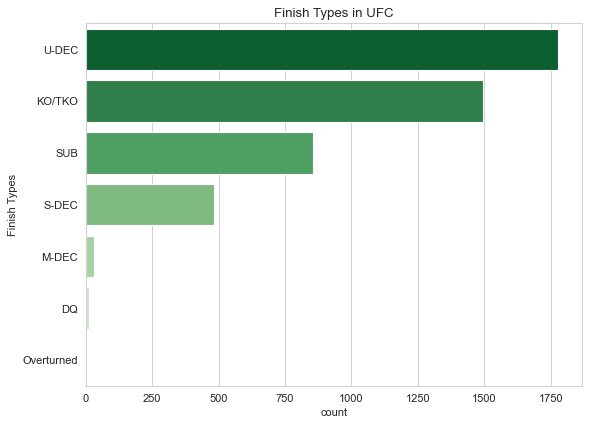

In [24]:
figure(figsize=(8, 6), dpi=80)
sns.countplot(data = finish_details, y = 'finish', 
              order = finish_details['finish'].value_counts().index, palette = 'Greens_r')
plt.title('Finish Types in UFC')
plt.ylabel('Finish Types')

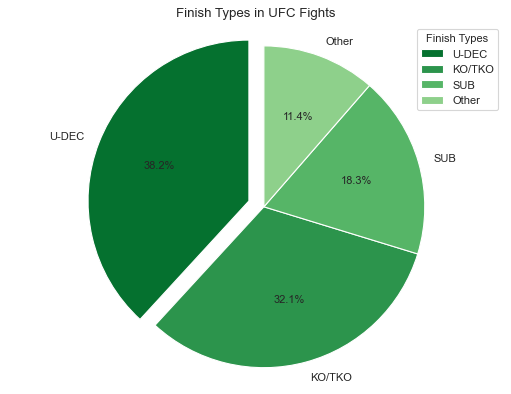

In [25]:
# Since we are only intrested in finishes, we wanted to make them more visible so we only showed finishes that havemore than 15% of the finishes of all fights
## The percentages give us a good insight that in the fights a little more than 50% of the fights ended in a finish
figure(figsize=(8, 6), dpi=80)

finish_types = finish_details['finish'].value_counts()
total_fights = finish_details.shape[0]
finish_types_percent = (finish_types / total_fights) * 100

other_finish = finish_types_percent[finish_types_percent < 15].sum()
finish_types_filtered = finish_types_percent[finish_types_percent >= 15]
finish_types_filtered['Other'] = other_finish

palette_color = sns.color_palette('Greens_r')

plt.pie(finish_types_filtered, labels=finish_types_filtered.index, autopct = '%1.1f%%', colors = palette_color, startangle = 90, explode=(0.1,0,0,0))
plt.axis('equal')
plt.title('Finish Types in UFC Fights')
plt.legend(title="Finish Types")
plt.show()

Text(0, 0.5, 'Finish Types')

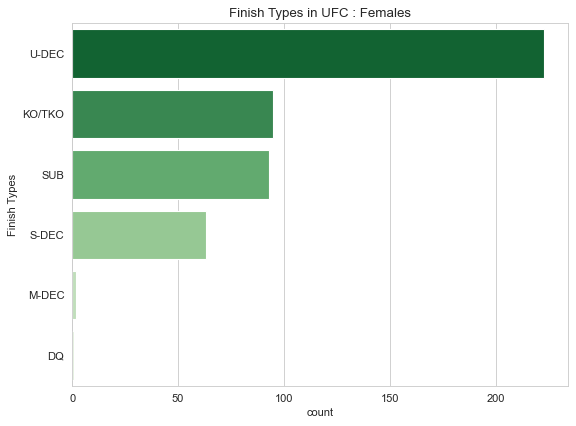

In [26]:
figure(figsize=(8, 6), dpi=80)

sns.countplot(data = women_finish, y = 'finish', 
              order = women_finish['finish'].value_counts().index, palette = 'Greens_r')
plt.title('Finish Types in UFC : Females')
plt.ylabel('Finish Types')

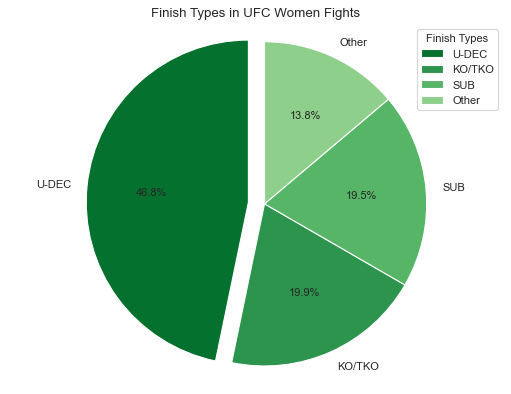

In [27]:
figure(figsize=(8, 6), dpi=80)

finish_types = women_finish['finish'].value_counts()
total_fights = women_finish.shape[0]
finish_types_percent = (finish_types / total_fights) * 100

other_finish = finish_types_percent[finish_types_percent < 15].sum()
finish_types_filtered = finish_types_percent[finish_types_percent >= 15]
finish_types_filtered['Other'] = other_finish

palette_color = sns.color_palette('Greens_r')

plt.pie(finish_types_filtered, labels=finish_types_filtered.index, autopct = '%1.1f%%', colors = palette_color, startangle = 90, explode=(0.1,0,0,0))
plt.axis('equal')
plt.title('Finish Types in UFC Women Fights')
plt.legend(title="Finish Types", loc = 'upper right')
plt.show()


Text(0, 0.5, 'Finish Types')

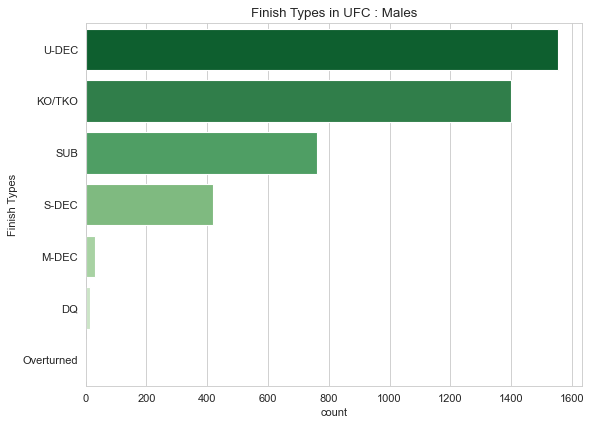

In [28]:
figure(figsize=(8, 6), dpi=80)

sns.countplot(data = men_finish, y = 'finish', 
              order = men_finish['finish'].value_counts().index, palette = 'Greens_r')
plt.title('Finish Types in UFC : Males')
plt.ylabel('Finish Types')

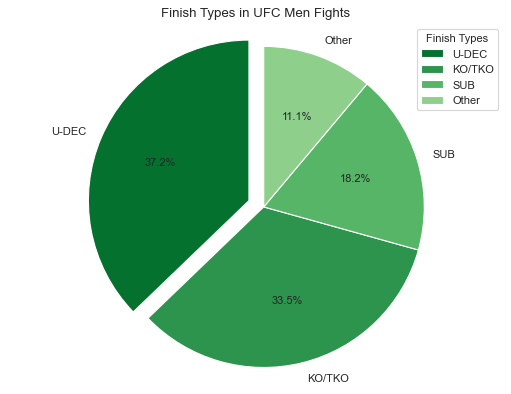

In [29]:
figure(figsize=(8, 6), dpi=80)

finish_types = men_finish['finish'].value_counts()
total_fights = men_finish.shape[0]
finish_types_percent = (finish_types / total_fights) * 100

other_finish = finish_types_percent[finish_types_percent < 15].sum()
finish_types_filtered = finish_types_percent[finish_types_percent >= 15]
finish_types_filtered['Other'] = other_finish

palette_color = sns.color_palette('Greens_r')

plt.pie(finish_types_filtered, labels=finish_types_filtered.index, autopct = '%1.1f%%', colors = palette_color, startangle = 90, explode=(0.1,0,0,0))
plt.axis('equal')
plt.title('Finish Types in UFC Men Fights')
plt.legend(title="Finish Types", loc = 'upper right')
plt.show()

Text(0, 0.5, 'Finish Details')

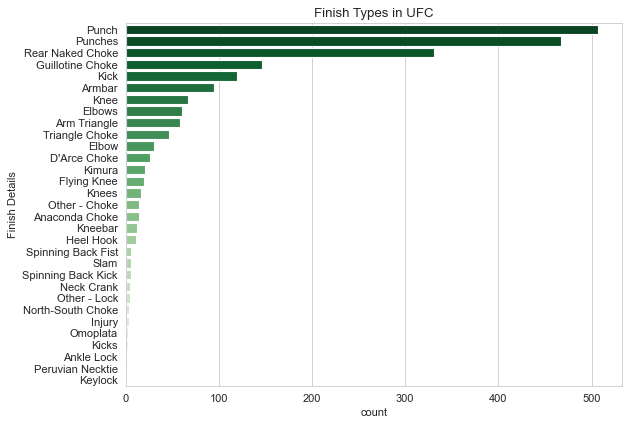

In [30]:
figure(figsize=(8, 6), dpi=80)

sns.countplot(data = finish_details, y = 'finish_details', 
              order = finish_details['finish_details'].value_counts().index, palette = 'Greens_r')
plt.title('Finish Types in UFC')
plt.ylabel('Finish Details')

In [31]:
finish_details.groupby('finish')['finish_details'].value_counts()

finish      finish_details    
DQ          Rear Naked Choke        1
KO/TKO      Punch                 506
            Punches               467
            Kick                  119
            Knee                   67
            Elbows                 60
            Elbow                  30
            Flying Knee            20
            Knees                  16
            Slam                    6
            Spinning Back Fist      6
            Spinning Back Kick      6
            Kicks                   2
Overturned  D'Arce Choke            1
            Punch                   1
SUB         Rear Naked Choke      330
            Guillotine Choke      146
            Armbar                 95
            Arm Triangle           58
            Triangle Choke         46
            D'Arce Choke           25
            Kimura                 21
            Anaconda Choke         14
            Other - Choke          14
            Kneebar                12
            Heel Ho

Text(0, 0.5, 'Finish Details')

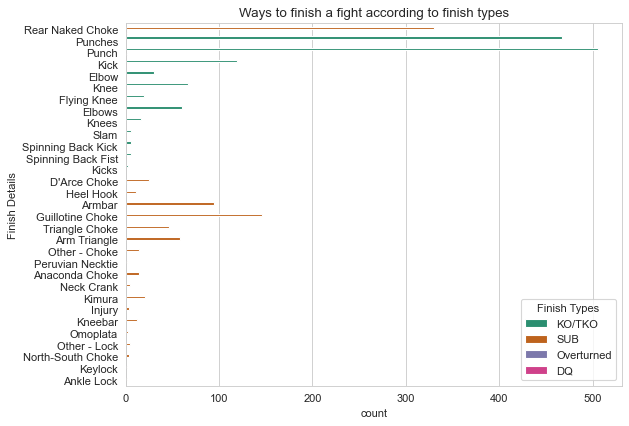

In [32]:
figure(figsize=(8, 6), dpi=80)

sns.countplot(data = finish_details.sort_values('finish'), y = 'finish_details',
              hue = 'finish', hue_order = ['KO/TKO', 'SUB', 'Overturned', 'DQ'],
             palette = 'Dark2').set_title('Ways to finish a fight according to finish types')
plt.legend(title = 'Finish Types', loc = 'lower right')
plt.ylabel('Finish Details')

Text(0, 0.5, 'Finish Types')

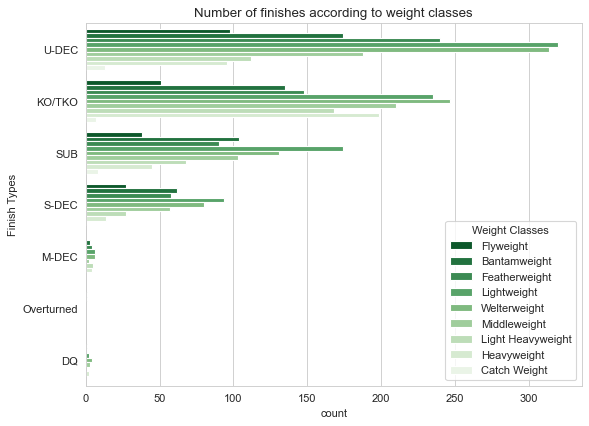

In [33]:
figure(figsize=(8, 6), dpi=80)
# based on weight 
sns.countplot(data = men_finish.sort_values('weight_class'), y = 'finish',
              hue = 'weight_class', hue_order = ['Flyweight', 'Bantamweight','Featherweight', 'Lightweight',
          'Welterweight', 'Middleweight', 'Light Heavyweight', 'Heavyweight', 'Catch Weight'],
             palette = 'Greens_r').set_title('Number of finishes according to weight classes')
plt.legend(title = 'Weight Classes', loc = 'lower right')
plt.ylabel('Finish Types')
#plt.yticks(rotation=45)

Text(0, 0.5, 'Finish Types')

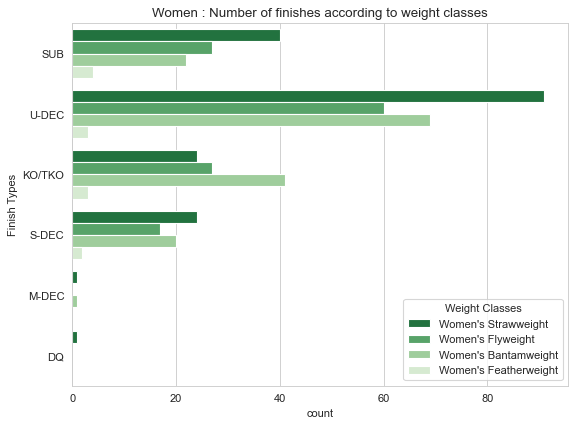

In [34]:
figure(figsize=(8, 6), dpi=80)

sns.countplot(data = women_finish.sort_values('weight_class'), y = 'finish',
              hue = 'weight_class', hue_order = ["Women's Strawweight", "Women's Flyweight", "Women's Bantamweight",
                                                "Women's Featherweight"], 
             palette = 'Greens_r').set_title('Women : Number of finishes according to weight classes')
plt.legend(title = 'Weight Classes', loc = 'lower right')
plt.ylabel('Finish Types')

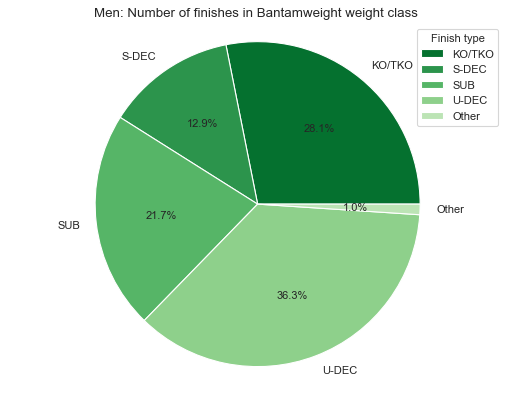

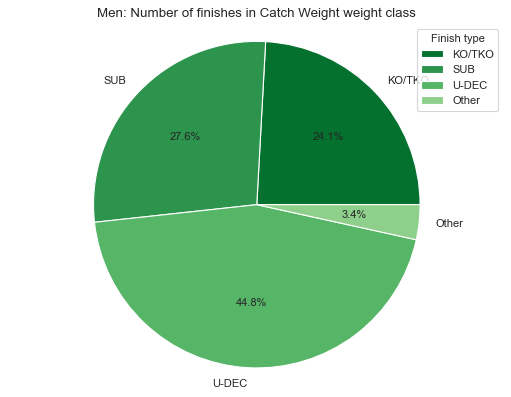

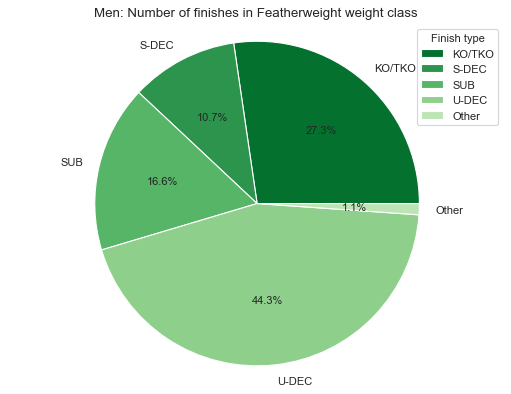

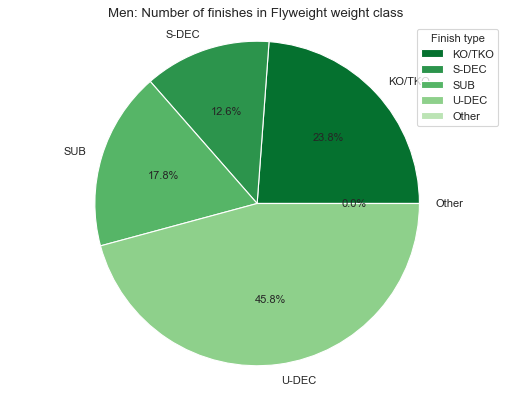

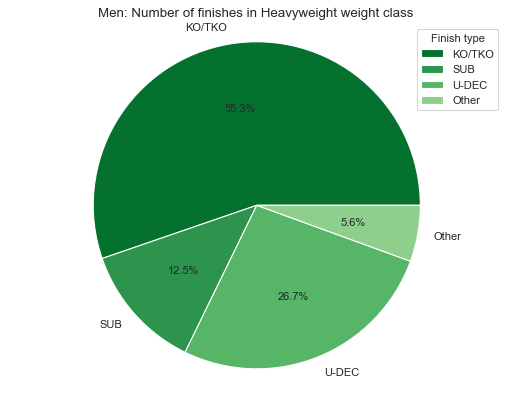

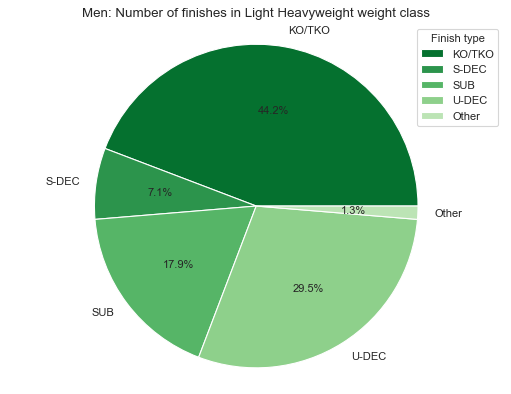

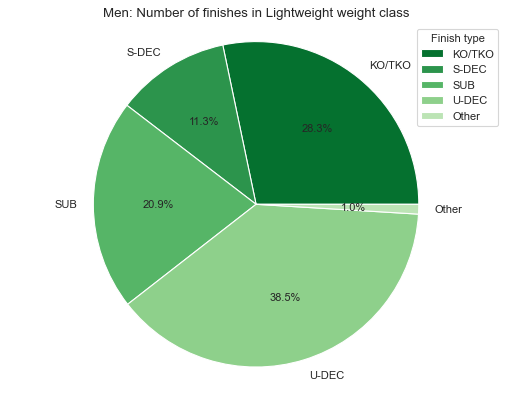

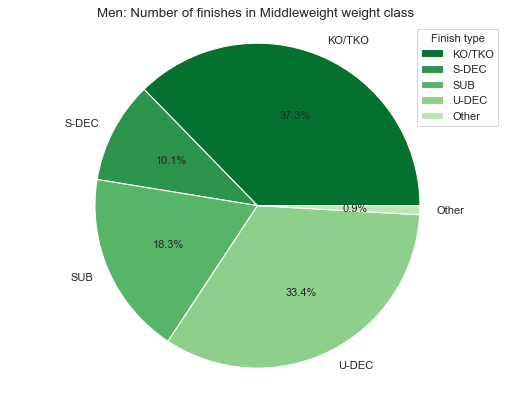

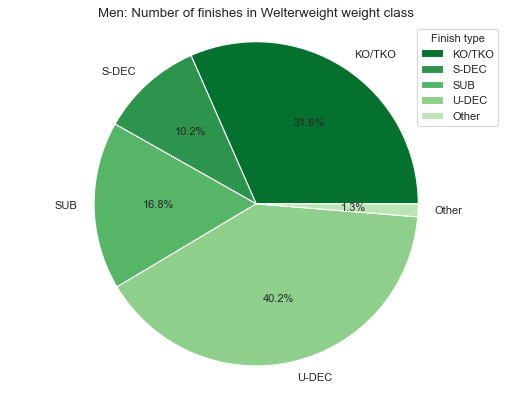

In [35]:
# Percentages of each type of finish for each weightclass, significant differences across the weight classes
weight_classes = men_finish['weight_class'].sort_values().unique()
f = sns.color_palette('Greens_r')
for wc in weight_classes:
    wc_data = men_finish[men_finish['weight_class'] == wc]
    finish_group = wc_data.groupby('finish').count()['weight_class']
    total_finish = finish_group.sum()
    finish_group_filtered = finish_group[finish_group/total_finish * 100 >= 5]
    other_finish = finish_group[finish_group/total_finish * 100 < 5].sum()
    finish_group_filtered['Other'] = other_finish
    plt.figure(figsize=(8, 6), dpi=80)
    plt.pie(finish_group_filtered, labels=finish_group_filtered.index, autopct='%1.1f%%', colors = f)
    plt.title(f'Men: Number of finishes in {wc} weight class')
    plt.axis('equal')
    plt.legend(title='Finish type', loc='upper right')
plt.show()


## Role of age 

In [36]:
finish_age = finish_details[['R_fighter', 'B_fighter', 'Winner', 'gender', 'R_age', 'B_age', 'finish', 'finish_details']]
finish_age.head()

,R_fighter,B_fighter,Winner,gender,R_age,B_age,finish,finish_details
0,Thiago Santos,Johnny Walker,Red,MALE,37,29,U-DEC,NaN
1,Alex Oliveira,Niko Price,Blue,MALE,33,32,U-DEC,NaN
2,Misha Cirkunov,Krzysztof Jotko,Blue,MALE,34,32,S-DEC,NaN
3,Alexander Hernandez,Mike Breeden,Red,MALE,29,32,KO/TKO,Punch
4,Joe Solecki,Jared Gordon,Blue,MALE,28,33,S-DEC,NaN


/Users/aymanelhattache/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/aymanelhattache/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Age Distribution Red')]

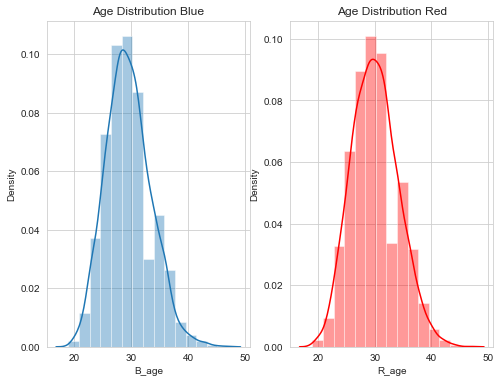

In [37]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(8, 6)

sns.distplot(ufc_df.B_age, bins = 15, ax = axes[0]).set(title = 'Age Distribution Blue')
sns.distplot(ufc_df.R_age, bins = 15,  ax = axes[1], color = 'red').set(title = 'Age Distribution Red')

finish      age_group    
DQ          above 30            9
            between 20-30       5
KO/TKO      between 20-30     772
            above 30          723
M-DEC       above 30           18
            between 20-30      14
Overturned  above 30            1
            between 20-30       1
S-DEC       between 20-30     254
            above 30          229
SUB         between 20-30     518
            above 30          332
            under 20            4
U-DEC       between 20-30    1016
            above 30          762
Name: age_group, dtype: int64


Text(0, 0.5, 'Finish Types')

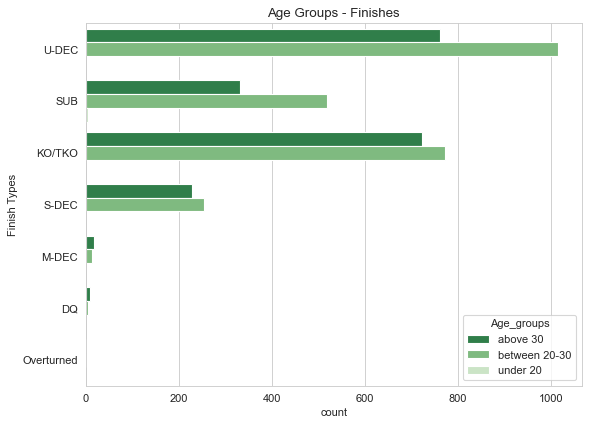

In [38]:
finish_age.loc[finish_age['R_age'] <= 20, 'age_group'] = 'under 20'
finish_age.loc[finish_age['R_age'].between(20,30), 'age_group'] = 'between 20-30'
finish_age.loc[finish_age['R_age'] > 30, 'age_group'] = 'above 30'

print(finish_age.groupby('finish')['age_group'].value_counts())

figure(figsize=(8, 6), dpi=80)

sns.countplot(data = finish_age.sort_values('age_group'), y = 'finish',
              hue = 'age_group', palette = 'Greens_r').set_title('Age Groups - Finishes')
plt.legend(title = 'Age_groups', loc = 'lower right')
plt.ylabel('Finish Types')


In [39]:
# This dataframe contains all fights where the age of the losing fighter is higher than 30
ufc_age_df = ufc_df[((ufc_df['Winner'] == 'Blue') & (ufc_df['R_age'] > 30)) | ((ufc_df['Winner'] == 'Red') & (ufc_df['B_age'] > 30))]

/var/folders/jq/kwdpx4p929gbkx28tlps52f80000gn/T/ipykernel_1882/3932543756.py:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  finish_counts_age = finish_counts_age.append(pd.Series({'Other': other_counts_age}))


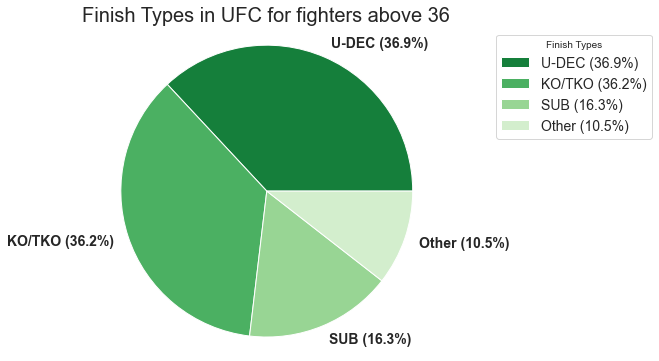

In [40]:
finish_counts_age = ufc_age_df['finish'].value_counts()

other_counts_age = finish_counts_age[finish_counts_age / finish_counts_age.sum() < 0.15].sum()
finish_counts_age = finish_counts_age[finish_counts_age / finish_counts_age.sum() >= 0.15]
finish_counts_age = finish_counts_age.append(pd.Series({'Other': other_counts_age}))

fig, ax = plt.subplots(figsize=(8, 6))

wedges, texts = plt.pie(finish_counts_age, labels=['{} ({:.1f}%)'.format(i, j/finish_counts_age.sum()*100) for i,j in zip(finish_counts_age.index, finish_counts_age)],
        colors=sns.color_palette("Greens_r", len(finish_counts_age)))
plt.setp(texts, size=14, weight="bold")
ax.set_title('Finish Types in UFC for fighters above 36', size=20)
plt.axis('equal')
plt.legend(title="Finish Types", loc='upper left', bbox_to_anchor=(1, 0, 0.5, 1), fontsize=14)
plt.show()

/var/folders/jq/kwdpx4p929gbkx28tlps52f80000gn/T/ipykernel_1882/3387903252.py:7: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  finish_details_age2 = finish_details_age2.append(pd.Series({'Other': other_counts_age2}))


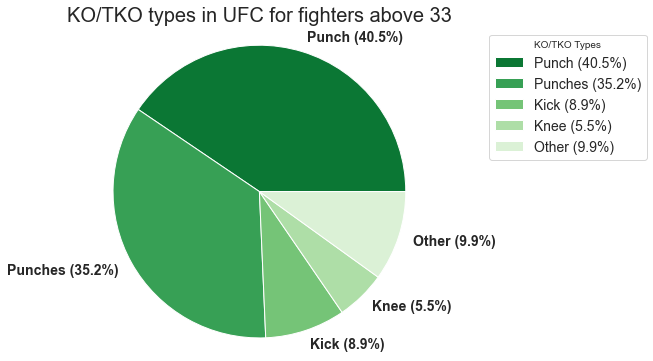

In [41]:
ufc_age_df2 = ufc_age_df[ufc_age_df['finish'] == 'KO/TKO']

finish_details_age2 = ufc_age_df2['finish_details'].value_counts()

other_counts_age2 = finish_details_age2[finish_details_age2 / finish_details_age2.sum() < 0.05].sum()
finish_details_age2 = finish_details_age2[finish_details_age2 / finish_details_age2.sum() >= 0.05]
finish_details_age2 = finish_details_age2.append(pd.Series({'Other': other_counts_age2}))

fig, ax = plt.subplots(figsize=(8, 6))
wedges, texts = plt.pie(finish_details_age2, labels=['{} ({:.1f}%)'.format(i, j/finish_details_age2.sum()*100) for i,j in zip(finish_details_age2.index, finish_details_age2)],
        colors=sns.color_palette("Greens_r", len(finish_details_age2)))
plt.setp(texts, size=14, weight="bold")
ax.set_title('KO/TKO types in UFC for fighters above 33', size=20)
plt.axis('equal')
plt.legend(title = "KO/TKO Types", loc = 'upper left', bbox_to_anchor=(1, 0, 0.5, 1), fontsize=14)
plt.show()

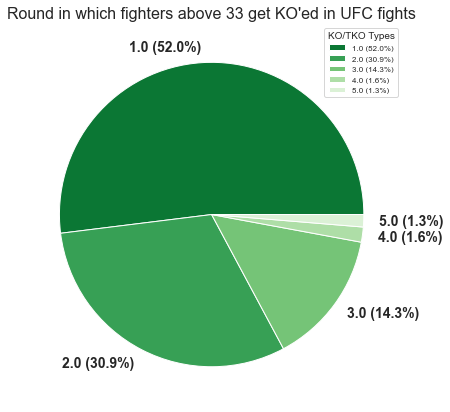

In [42]:
finish_details_age2 = ufc_age_df2['finish_round'].value_counts()

fig, ax = plt.subplots(figsize=(10, 7))

wedges, texts = plt.pie(finish_details_age2, labels=['{} ({:.1f}%)'.format(i, j/finish_details_age2.sum()*100) for i,j in zip(finish_details_age2.index, finish_details_age2)],
        colors=sns.color_palette("Greens_r", len(finish_details_age2)))

plt.setp(texts, size=14, weight="bold")
ax.set_title('Round in which fighters above 33 get KO\'ed in UFC fights', size = 16)
plt.legend(title = "KO/TKO Types", loc = 'upper right', fontsize=8)
plt.show()


## Role of height and reach

In [43]:
id_df = ufc_df[['Winner', 'gender', 'weight_class','B_fighter', 'B_Stance','B_Height_cms', 'B_Reach_cms', 'B_Weight_lbs','R_fighter','R_Stance','R_Height_cms', 'R_Reach_cms','reach_dif', 'height_dif', 'R_Weight_lbs', 'finish_details', 'finish_round','finish']]
id_df.set_index('Winner').head()

,gender,weight_class,B_fighter,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_fighter,R_Stance,R_Height_cms,R_Reach_cms,reach_dif,height_dif,R_Weight_lbs,finish_details,finish_round,finish
Winner,,,,,,,,,,,,,,,,,
Red,MALE,Light Heavyweight,Johnny Walker,Orthodox,198.12,208.28,205,Thiago Santos,Orthodox,187.96,193.04,15.24,10.16,205,NaN,5.0,U-DEC
Blue,MALE,Welterweight,Niko Price,Orthodox,182.88,193.04,170,Alex Oliveira,Orthodox,180.34,193.04,0.00,2.54,170,NaN,3.0,U-DEC
Blue,MALE,Middleweight,Krzysztof Jotko,Southpaw,185.42,195.58,185,Misha Cirkunov,Orthodox,190.50,195.58,0.00,-5.08,205,NaN,3.0,S-DEC
Red,MALE,Lightweight,Mike Breeden,Orthodox,177.80,177.80,155,Alexander Hernandez,Orthodox,175.26,182.88,-5.08,2.54,155,Punch,1.0,KO/TKO
Blue,MALE,Lightweight,Jared Gordon,Orthodox,175.26,172.72,145,Joe Solecki,Orthodox,175.26,177.80,-5.08,0.00,155,NaN,3.0,S-DEC


In [44]:
finish_df = id_df[['Winner','B_Height_cms', 'R_Height_cms', 'B_Reach_cms', 'R_Reach_cms', 'B_Stance', 'R_Stance','finish_details', 'finish_round','finish']]

In [45]:
height_dif = finish_df['B_Height_cms'] - finish_df['R_Height_cms']
finish_df['Height_diff']=height_dif

reach_dif = finish_df['B_Reach_cms'] - finish_df['R_Reach_cms']
finish_df['Reach_diff']=reach_dif

/var/folders/jq/kwdpx4p929gbkx28tlps52f80000gn/T/ipykernel_1882/850838367.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finish_df['Height_diff']=height_dif
/var/folders/jq/kwdpx4p929gbkx28tlps52f80000gn/T/ipykernel_1882/850838367.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finish_df['Reach_diff']=reach_dif


In [46]:
x = finish_df['Height_diff']

In [47]:
tall_wins = 0
total = len(finish_df)
for index, row in finish_df.iterrows():
    if row['Height_diff']>0 and row['Winner']=='Blue':
        tall_wins+=1
    elif row['Height_diff']<0 and row['Winner']=='Red':
        tall_wins+=1     

percentage_tall = (tall_wins/total)*100
print('The percentage of the taller fighters that win is: ', round(percentage_tall,1), '%')

The percentage of the taller fighters that win is:  42.7 %


In [48]:
reach_wins = 0
for index, row in finish_df.iterrows():
    if row['Reach_diff']>0 and row['Winner']=='Blue':
        reach_wins+=1
    elif row['Reach_diff']<0 and row['Winner']=='Red':
        reach_wins+=1     

percentage_reach = (reach_wins/total)*100
print('The percentage of the fighters with a higher reach that win is: ', round(percentage_reach,1), '%')

The percentage of the fighters with a higher reach that win is:  46.2 %


In [49]:
short_wins = 0
total_s = len(finish_df)
for index, row in finish_df.iterrows():
    if row['Height_diff']<0 and row['Winner']=='Blue':
        short_wins+=1
    elif row['Height_diff']>0 and row['Winner']=='Red':
        short_wins+=1     

percentage_short = (short_wins/total)*100
print('The percentage of the shorter fighters that win is: ', round(percentage_short,1), '%')

The percentage of the shorter fighters that win is:  40.3 %


In [50]:
reach_wins_s = 0
for index, row in finish_df.iterrows():
    if row['Reach_diff']<0 and row['Winner']=='Blue':
        reach_wins_s+=1
    elif row['Reach_diff']>0 and row['Winner']=='Red':
        reach_wins_s+=1     

percentage_reach_s = (reach_wins_s/total)*100
print('The percentage of the fighters with a lower reach that win is: ', round(percentage_reach_s,1), '%')

The percentage of the fighters with a lower reach that win is:  41.4 %


In [51]:
winners = pd.DataFrame()
blue= finish_df[finish_df['Winner'] == 'Blue']
blue_df = pd.DataFrame(blue, columns = ['B_Height_cms', 'B_Stance','B_Reach_cms','Reach_diff', 'Height_diff','finish_details', 'finish_round', 'finish'])
red = finish_df[finish_df['Winner'] == 'Red']
red_df = pd.DataFrame(red, columns = ['R_Height_cms','R_Stance', 'R_Reach_cms','Reach_diff', 'Height_diff','finish_details', 'finish_round', 'finish'])

# all winners from the blue and red corners together with their individual information have 
# been separated and put into a dataframe (winners_df)

In [52]:
blue_df.rename(columns={'B_Stance':'Stance','B_Height_cms': 'Height', 'B_Reach_cms': 'Reach'}, inplace=True)
red_df.rename(columns={'R_Stance':'Stance','R_Height_cms': 'Height', 'R_Reach_cms': 'Reach'}, inplace=True)

In [53]:
frames = [blue_df, red_df]
winners = pd.concat(frames)
# There is no distinction made between red corner and blue corner winners in this research and project. 

In [54]:
x_ = winners['Height_diff']
y = winners['finish_details']
z = winners['Reach_diff']
f = winners['finish_round']
g = winners['Stance']

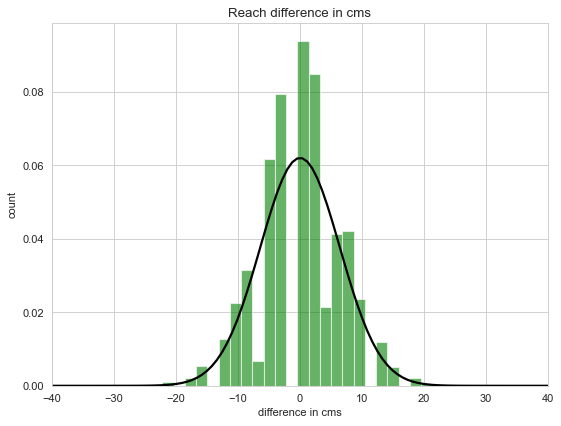

In [55]:
figure(figsize=(8, 6), dpi=80)
mu, std = norm.fit(x_) 
  
plt.hist(x_, bins=35, density=True, alpha=0.6, color='g')
plt.xlim(-40,40)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
  
plt.plot(x, p, 'k', linewidth=2)
plt.title('Reach difference in cms')
plt.xlabel('difference in cms')
plt.ylabel('count')
  
plt.show()


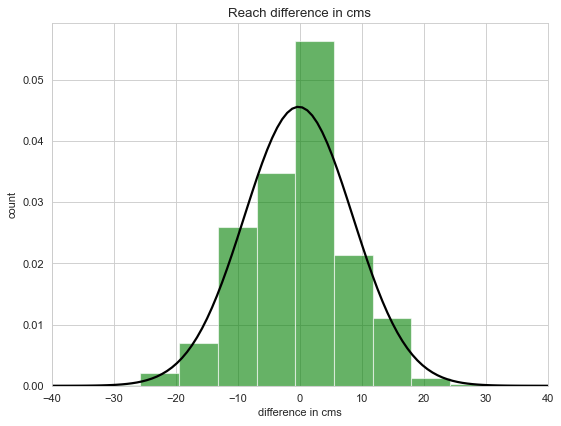

In [56]:
figure(figsize=(8, 6), dpi=80)

mu, std = norm.fit(z) 
  
plt.hist(z, bins=35, density=True, alpha=0.6, color='g')
plt.xlim(-40,40)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
  
plt.plot(x, p, 'k', linewidth=2)
plt.title('Reach difference in cms')
plt.xlabel('difference in cms')
plt.ylabel('count')
  
plt.show()

[Text(0.5, 1.0, 'A count of the rounds it takes to win a fight')]

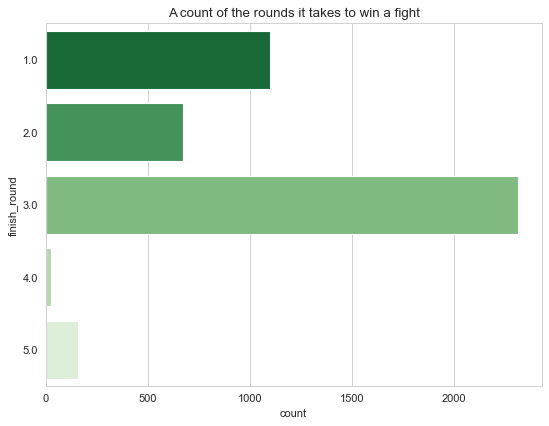

In [57]:
figure(figsize=(8, 6), dpi=80)

sns.countplot(data = winners.sort_values('finish_round'), y = 'finish_round', palette = 'Greens_r').set(title='A count of the rounds it takes to win a fight')

[Text(0.5, 1.0, 'A count of stances used by fighters')]

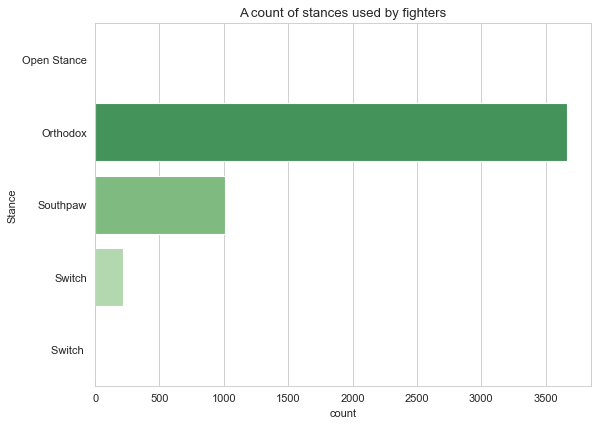

In [58]:
figure(figsize=(8, 6), dpi=80)

sns.countplot(data = winners.sort_values('Stance'), y = 'Stance', palette = 'Greens_r').set(title='A count of stances used by fighters')

In [59]:
pos_reach = pd.DataFrame()
pos_reach = winners[winners['Reach_diff'] > 0]
neg_reach = pd.DataFrame()
neg_reach = winners[winners['Reach_diff'] < 0]

# A dataframe for the winners with a shorter reach and a longer reach has been created

[Text(0.5, 1.0, 'Finishing techniques used by fighters with a higher reach')]

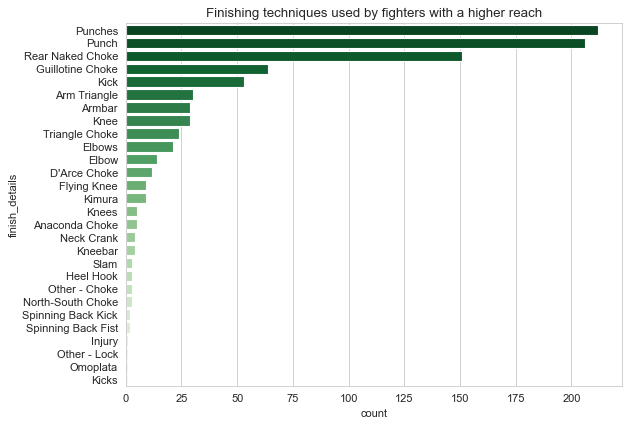

In [60]:
figure(figsize=(8, 6), dpi=80)

sns.countplot(data = pos_reach.sort_values('finish_details'), y = 'finish_details', 
              order = pos_reach['finish_details'].value_counts().index,
              palette = 'Greens_r').set(title='Finishing techniques used by fighters with a higher reach')

[Text(0.5, 1.0, 'Finishing techniques used by fighters with a shorter reach')]

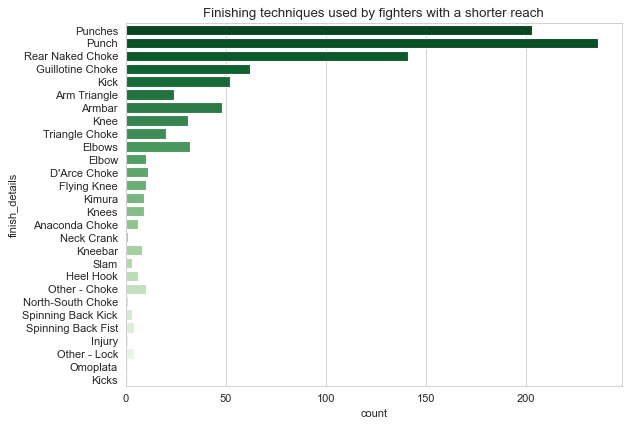

In [61]:
figure(figsize=(8, 6), dpi=80)

sns.countplot(data = neg_reach.sort_values('finish_details'), y = 'finish_details',   
              order = pos_reach['finish_details'].value_counts().index,
              palette = 'Greens_r').set(title='Finishing techniques used by fighters with a shorter reach')

/var/folders/jq/kwdpx4p929gbkx28tlps52f80000gn/T/ipykernel_1882/3915698833.py:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  finish_counts_pos_reach = finish_counts_pos_reach.append(pd.Series({'Other': other_counts_pos_reach}))


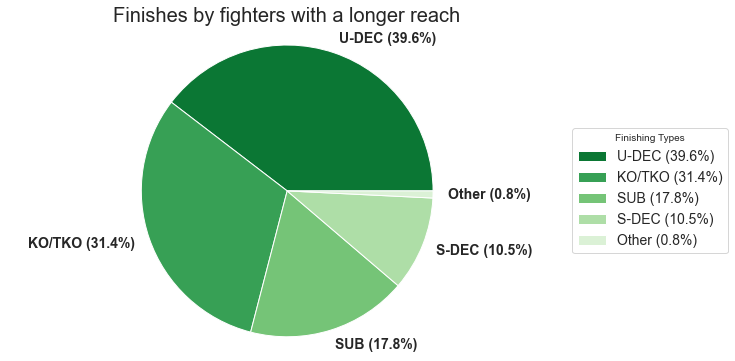

In [62]:
finish_counts_pos_reach = pos_reach['finish'].value_counts()

other_counts_pos_reach = finish_counts_pos_reach[finish_counts_pos_reach / finish_counts_pos_reach.sum() < 0.05].sum()
finish_counts_pos_reach = finish_counts_pos_reach[finish_counts_pos_reach / finish_counts_pos_reach.sum() >= 0.05]
finish_counts_pos_reach = finish_counts_pos_reach.append(pd.Series({'Other': other_counts_pos_reach}))

fig, ax = plt.subplots(figsize=(10, 6))
wedges, texts = plt.pie(finish_counts_pos_reach, labels=['{} ({:.1f}%)'.format(i, j/finish_counts_pos_reach.sum()*100) for i,j in zip(finish_counts_pos_reach.index, finish_counts_pos_reach)],
        colors=sns.color_palette("Greens_r", len(finish_counts_pos_reach)))
plt.setp(texts, size=14, weight="bold")
ax.set_title('Finishes by fighters with a longer reach', size=20)
plt.axis('equal')
plt.legend(title = "Finishing Types", loc = 'center left', bbox_to_anchor=(1, 0, 0.5, 1), fontsize=14)
plt.show()

/var/folders/jq/kwdpx4p929gbkx28tlps52f80000gn/T/ipykernel_1882/771570813.py:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  finish_counts_neg_reach = finish_counts_neg_reach.append(pd.Series({'Other': other_counts_neg_reach}))


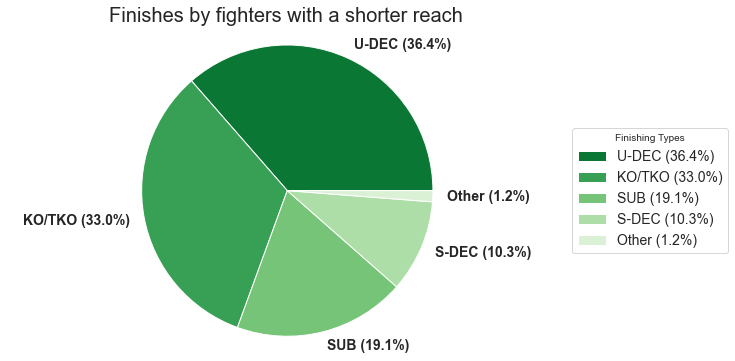

In [63]:
finish_counts_neg_reach = neg_reach['finish'].value_counts()

other_counts_neg_reach = finish_counts_neg_reach[finish_counts_neg_reach / finish_counts_neg_reach.sum() < 0.05].sum()
finish_counts_neg_reach = finish_counts_neg_reach[finish_counts_neg_reach / finish_counts_neg_reach.sum() >= 0.05]
finish_counts_neg_reach = finish_counts_neg_reach.append(pd.Series({'Other': other_counts_neg_reach}))

fig, ax = plt.subplots(figsize=(10, 6))
wedges, texts = plt.pie(finish_counts_neg_reach, labels=['{} ({:.1f}%)'.format(i, j/finish_counts_neg_reach.sum()*100) for i,j in zip(finish_counts_neg_reach.index, finish_counts_neg_reach)],
        colors=sns.color_palette("Greens_r", len(finish_counts_neg_reach)))
plt.setp(texts, size=14, weight="bold")
ax.set_title('Finishes by fighters with a shorter reach', size=20)
plt.axis('equal')
plt.legend(title = "Finishing Types", loc = 'center left', bbox_to_anchor=(1, 0, 0.5, 1), fontsize=14)
plt.show()

In [64]:
print(len(pos_reach))
print(len(neg_reach))

2148
2138


In [65]:
pos_height = pd.DataFrame()
pos_height = winners[winners['Height_diff'] > 0]
neg_height = pd.DataFrame()
neg_height = winners[winners['Height_diff'] < 0]

# A dataframe for the winners with a shorter height and a longer height has been created

[Text(0.5, 1.0, 'Finishing techniques used by taller fighters')]

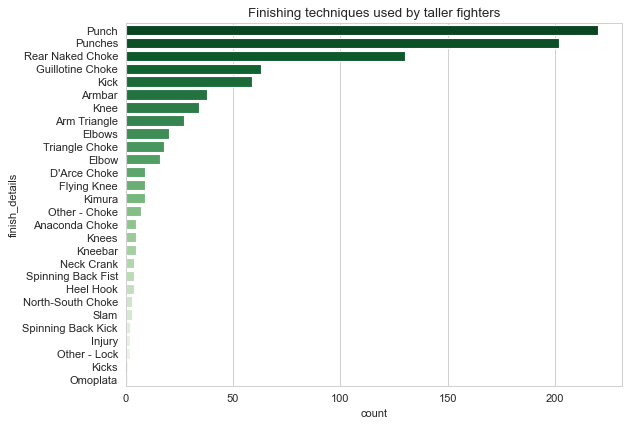

In [66]:
figure(figsize=(8, 6), dpi=80)

sns.countplot(data = pos_height.sort_values('finish_details'), y = 'finish_details',
              order = pos_height['finish_details'].value_counts().index,
              palette = 'Greens_r').set(title='Finishing techniques used by taller fighters')


[Text(0.5, 1.0, 'Finishing techniques used by shorter fighters')]

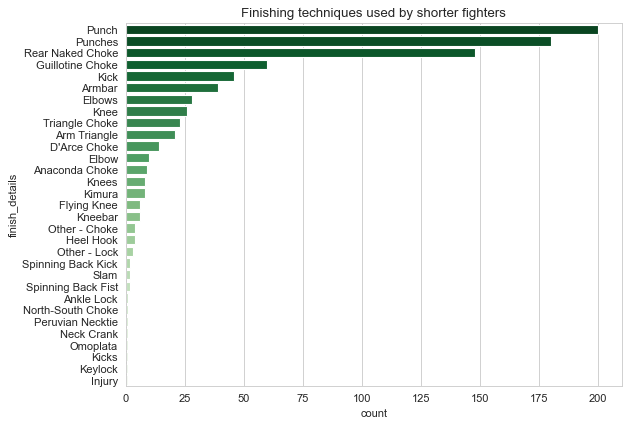

In [67]:
figure(figsize=(8, 6), dpi=80)

sns.countplot(data = neg_height.sort_values('finish_details'), y = 'finish_details',
              order = neg_height['finish_details'].value_counts().index,
              palette = 'Greens_r').set(title='Finishing techniques used by shorter fighters')


/var/folders/jq/kwdpx4p929gbkx28tlps52f80000gn/T/ipykernel_1882/2652658728.py:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  finish_details_pos_height = finish_details_pos_height.append(pd.Series({'Other': other_counts_pos_height}))


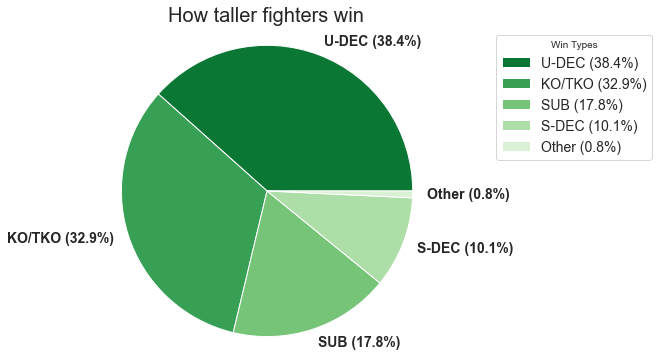

In [68]:
finish_details_pos_height = pos_height['finish'].value_counts()

other_counts_pos_height = finish_details_pos_height[finish_details_pos_height / finish_details_pos_height.sum() < 0.05].sum()
finish_details_pos_height = finish_details_pos_height[finish_details_pos_height / finish_details_pos_height.sum() >= 0.05]
finish_details_pos_height = finish_details_pos_height.append(pd.Series({'Other': other_counts_pos_height}))

fig, ax = plt.subplots(figsize=(8, 6))
wedges, texts = plt.pie(finish_details_pos_height, labels=['{} ({:.1f}%)'.format(i, j/finish_details_pos_height.sum()*100) for i,j in zip(finish_details_pos_height.index, finish_details_pos_height)],
        colors=sns.color_palette("Greens_r", len(finish_details_pos_height)))
plt.setp(texts, size=14, weight="bold")
ax.set_title('How taller fighters win', size=20)
plt.axis('equal')
plt.legend(title = "Win Types", loc = 'upper left', bbox_to_anchor=(1, 0, 0.5, 1), fontsize=14)
plt.show()

/var/folders/jq/kwdpx4p929gbkx28tlps52f80000gn/T/ipykernel_1882/857499197.py:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  finish_details_neg_height = finish_details_neg_height.append(pd.Series({'Other': other_counts_neg_height}))


<function matplotlib.pyplot.show(close=None, block=None)>

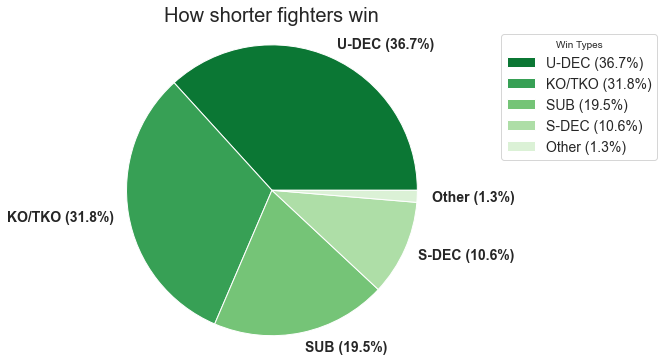

In [69]:
finish_details_neg_height = neg_height['finish'].value_counts()

other_counts_neg_height = finish_details_neg_height[finish_details_neg_height / finish_details_neg_height.sum() < 0.05].sum()
finish_details_neg_height = finish_details_neg_height[finish_details_neg_height / finish_details_neg_height.sum() >= 0.05]
finish_details_neg_height = finish_details_neg_height.append(pd.Series({'Other': other_counts_neg_height}))

fig, ax = plt.subplots(figsize=(8, 6))
wedges, texts = plt.pie(finish_details_neg_height, labels=['{} ({:.1f}%)'.format(i, j/finish_details_neg_height.sum()*100) for i,j in zip(finish_details_neg_height.index, finish_details_neg_height)],
        colors=sns.color_palette("Greens_r", len(finish_details_neg_height)))
plt.setp(texts, size=14, weight="bold")
ax.set_title('How shorter fighters win', size=20)
plt.axis('equal')
plt.legend(title = "Win Types", loc = 'upper left', bbox_to_anchor=(1, 0, 0.5, 1), fontsize=14)
plt.show

In [70]:
sub = neg_reach[neg_reach['finish']=='SUB']
print('the average negative reach difference for the ones that win by submision is:',sub['Reach_diff'].mean())
sub_ = pos_reach[pos_reach['finish']=='SUB']
print('the average positive reach difference for the ones that win by submision is:',sub_['Reach_diff'].mean())

sub1 = neg_height[neg_height['finish']=='SUB']
print('the average negative height difference for the ones that win by submision is:',sub1['Height_diff'].mean())
sub1_ = pos_height[pos_height['finish']=='SUB']
print('the average positive height difference for the ones that win by submision is:',sub1_['Height_diff'].mean())


the average negative reach difference for the ones that win by submision is: -7.751524547803592
the average positive reach difference for the ones that win by submision is: 7.457863013698597
the average negative height difference for the ones that win by submision is: -5.90474114441415
the average positive height difference for the ones that win by submision is: 5.96971751412428


Text(0, 0.5, 'count')

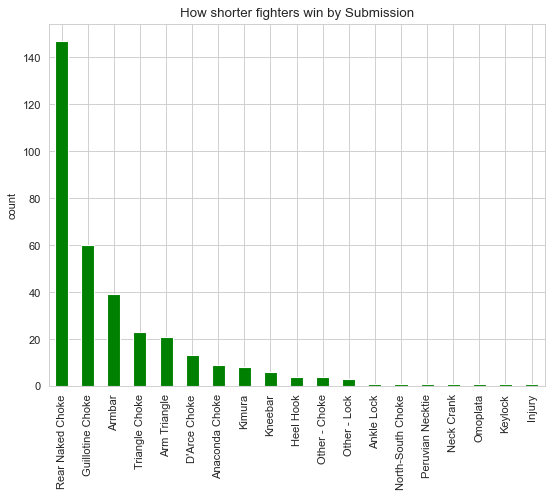

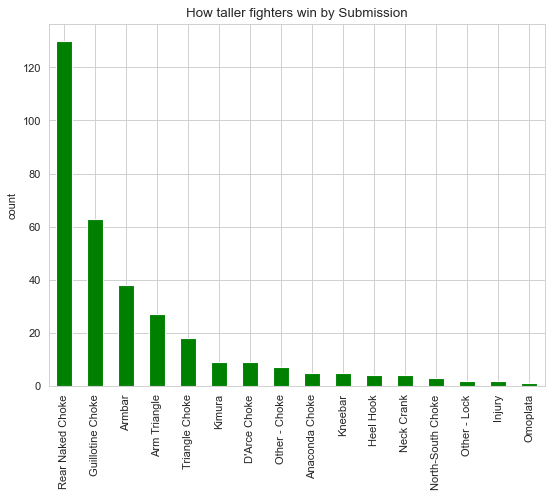

In [71]:
figure(figsize=(8, 6), dpi=80)

sub1['finish_details'].value_counts().plot(kind='bar', color='green')
plt.title('How shorter fighters win by Submission')
plt.ylabel('count')

figure(figsize=(8, 6), dpi=80)
sub1_['finish_details'].value_counts().plot(kind='bar', color='green')
plt.title('How taller fighters win by Submission')
plt.ylabel('count')

In [72]:
tko_s =neg_height[neg_height['finish']=='KO/TKO']
tko_l =pos_height[pos_height['finish']=='KO/TKO']

Text(0, 0.5, 'count')

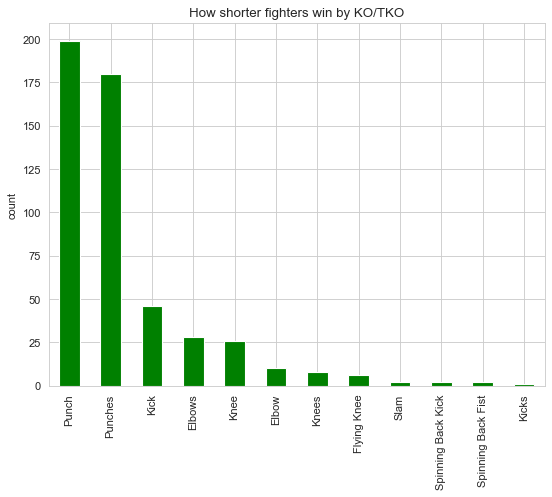

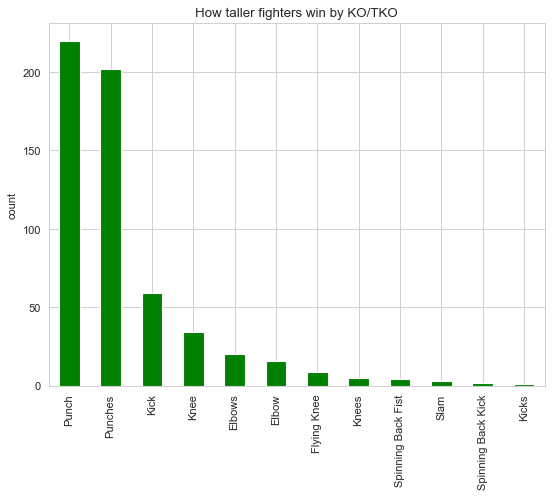

In [73]:
figure(figsize=(8, 6), dpi=80)

tko_s['finish_details'].value_counts().plot(kind='bar', color='green')
plt.title('How shorter fighters win by KO/TKO')
plt.ylabel('count')

figure(figsize=(8, 6), dpi=80)

tko_l['finish_details'].value_counts().plot(kind='bar', color='green')
plt.title('How taller fighters win by KO/TKO')
plt.ylabel('count')

## Role of fighters' rank

In [84]:
ufc_df['B_match_weightclass_rank'].fillna(value=16, inplace=True)
ufc_df['R_match_weightclass_rank'].fillna(value=16, inplace=True)

red_wins = ufc_df[ufc_df['Winner'] == 'Red']
ranks_red_winners = red_wins['R_match_weightclass_rank']

red_loses = ufc_df[ufc_df['Winner'] == 'Blue']
ranks_red_losers = red_loses['R_match_weightclass_rank']

blue_wins = ufc_df[ufc_df['Winner'] == 'Blue']
ranks_blue_winners = blue_wins['B_match_weightclass_rank']

blue_loses = ufc_df[ufc_df['Winner'] == 'Red']
ranks_blue_losers = blue_loses['B_match_weightclass_rank']

ranks_winners = ranks_red_winners.append(ranks_blue_winners)
ranks_losers = ranks_blue_losers.append(ranks_red_losers)

same_rank_fights = sum(ranks_winners == ranks_losers)

higher_rank_wins = sum(ranks_winners < ranks_losers)

lower_rank_wins = sum(ranks_winners > ranks_losers)

total_fights = same_rank_fights + higher_rank_wins + lower_rank_wins

total_ranked_fights = higher_rank_wins + lower_rank_wins

higher_rank_percentage = higher_rank_wins/(total_ranked_fights/100)

lower_rank_percentage = lower_rank_wins/(total_ranked_fights/100)


print('The total amount of fights without considering ranks is: ' + str(total_fights))
print('The total amount of fights that were fought between unranked fighters is: ' + str(same_rank_fights))
print('Therefore, the total amount of fights that see at least one of the two fighters being ranked within the top 15 ranks of a certain weightclass is: ' + str(total_ranked_fights))
print('In ' + str(higher_rank_wins) + ' of those fights, the higher ranked fighters won, while in ' + str(lower_rank_wins) + ' of those fights, the lower ranked fighters won.')
print('In percentage to the total amount of ranked fights, the higher ranked fighter won ' + str(round(higher_rank_percentage)) + ' percent of the times, while the lower ranked fighter ' + str(round(lower_rank_percentage)) + ' percent of the times.')

The total amount of fights without considering ranks is: 4896
The total amount of fights that were fought between unranked fighters is: 3523
Therefore, the total amount of fights that see at least one of the two fighters being ranked within the top 15 ranks of a certain weightclass is: 1373
In 840 of those fights, the higher ranked fighters won, while in 533 of those fights, the lower ranked fighters won.
In percentage to the total amount of ranked fights, the higher ranked fighter won 61 percent of the times, while the lower ranked fighter 39 percent of the times.


/var/folders/jq/kwdpx4p929gbkx28tlps52f80000gn/T/ipykernel_1882/2579663912.py:16: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ranks_winners = ranks_red_winners.append(ranks_blue_winners)
/var/folders/jq/kwdpx4p929gbkx28tlps52f80000gn/T/ipykernel_1882/2579663912.py:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ranks_losers = ranks_blue_losers.append(ranks_red_losers)


In [85]:
ufc_df['B_match_weightclass_rank'].fillna(value=16, inplace=True)
ufc_df['R_match_weightclass_rank'].fillna(value=16, inplace=True)

red_wins = ufc_df[ufc_df['Winner'] == 'Red']
ranks_red_winners = red_wins['R_match_weightclass_rank']
red_winners_time = red_wins['total_fight_time_secs']

red_loses = ufc_df[ufc_df['Winner'] == 'Blue']
ranks_red_losers = red_loses['R_match_weightclass_rank']

blue_wins = ufc_df[ufc_df['Winner'] == 'Blue']
ranks_blue_winners = blue_wins['B_match_weightclass_rank']
blue_winners_time = blue_wins['total_fight_time_secs']

blue_loses = ufc_df[ufc_df['Winner'] == 'Red']
ranks_blue_losers = blue_loses['B_match_weightclass_rank']

ranks_winners = ranks_red_winners.append(ranks_blue_winners)
ranks_losers = ranks_blue_losers.append(ranks_red_losers)
fight_time = red_winners_time.append(blue_winners_time)

total_fight_time_higher_rank = 0
total_fight_time_lower_rank = 0
higher_rank_wins = 0
lower_rank_wins = 0

for i in range(len(ranks_winners)):
    if(ranks_winners[i] < ranks_losers[i] and not pd.isna(fight_time[i])):
        total_fight_time_higher_rank += fight_time[i]
        higher_rank_wins += 1
    elif(ranks_winners[i] > ranks_losers[i] and not pd.isna(fight_time[i])):
        total_fight_time_lower_rank += fight_time[i]
        lower_rank_wins += 1

average_fight_time_higher_rank = total_fight_time_higher_rank/higher_rank_wins

average_fight_time_lower_rank = total_fight_time_lower_rank/lower_rank_wins

total_fights_official_time = higher_rank_wins + lower_rank_wins


print('The total amount of fights without considering ranks is: ' + str(total_fights))
print('The total amount of fights that were fought between unranked fighters is: ' + str(same_rank_fights))
print('The total amount of fights that see at least one of the two fighters being ranked within the top 15 ranks of a certain weightclass is: ' + str(total_ranked_fights))
print('The total amount of fights that see both fighters having an official rank and a registered finishing time is: ' + str(total_fights_official_time))
print('In ' + str(higher_rank_wins) + ' of those fights, the higher ranked fighters won, while in ' + str(lower_rank_wins) + ' of those fights, the lower ranked fighters won.')
print('The average fight time, in seconds, of the occurrences in which higher ranked fighters won against lower ranked fighters is: ' + str(round(average_fight_time_higher_rank)))
print('The average fight time, in seconds, of the occurrences in which lower ranked fighters won against higher ranked fighters is: ' + str(round(average_fight_time_lower_rank)))

The total amount of fights without considering ranks is: 4896
The total amount of fights that were fought between unranked fighters is: 3523
The total amount of fights that see at least one of the two fighters being ranked within the top 15 ranks of a certain weightclass is: 1373
The total amount of fights that see both fighters having an official rank and a registered finishing time is: 1373
In 840 of those fights, the higher ranked fighters won, while in 533 of those fights, the lower ranked fighters won.
The average fight time, in seconds, of the occurrences in which higher ranked fighters won against lower ranked fighters is: 745
The average fight time, in seconds, of the occurrences in which lower ranked fighters won against higher ranked fighters is: 698


/var/folders/jq/kwdpx4p929gbkx28tlps52f80000gn/T/ipykernel_1882/201368727.py:18: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ranks_winners = ranks_red_winners.append(ranks_blue_winners)
/var/folders/jq/kwdpx4p929gbkx28tlps52f80000gn/T/ipykernel_1882/201368727.py:19: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ranks_losers = ranks_blue_losers.append(ranks_red_losers)
/var/folders/jq/kwdpx4p929gbkx28tlps52f80000gn/T/ipykernel_1882/201368727.py:20: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fight_time = red_winners_time.append(blue_winners_time)


In [75]:
# Blue - Red 
ufc_df['ranking_diff'] = ufc_df['B_match_weightclass_rank']-ufc_df['R_match_weightclass_rank']

In [76]:
ufc_ranking_lower_wins = ufc_df[((ufc_df['Winner'] == 'Blue') & (ufc_df['ranking_diff'] > 0)) |((ufc_df['Winner'] == 'Red') & (ufc_df['ranking_diff'] < 0)) ]

In [77]:
ufc_ranking_higher_wins = ufc_df[((ufc_df['Winner'] == 'Red') & (ufc_df['ranking_diff'] > 0)) |((ufc_df['Winner'] == 'Blue') & (ufc_df['ranking_diff'] < 0)) ]

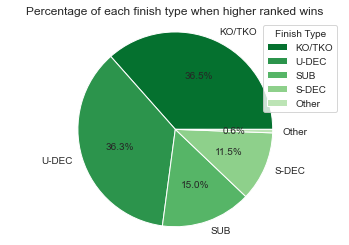

In [78]:
finish_counts = ufc_ranking_lower_wins['finish'].value_counts()
finish_percentages = (finish_counts / finish_counts.sum()) * 100
other_finish = finish_percentages[finish_percentages < 5].sum()
finish_percentages = finish_percentages[finish_percentages >= 5]
finish_percentages['Other'] = other_finish
sns.set_palette("Greens_r")
plt.pie(finish_percentages, labels=finish_percentages.index, autopct='%1.1f%%')
plt.axis('equal')
plt.legend(title="Finish Type")
plt.title("Percentage of each finish type when higher ranked wins")
plt.show()

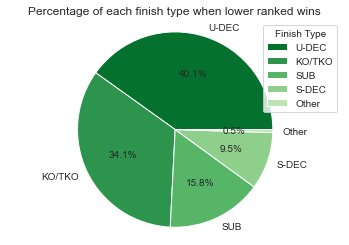

In [79]:
finish_counts = ufc_ranking_higher_wins['finish'].value_counts()
finish_percentages = (finish_counts / finish_counts.sum()) * 100
other_finish = finish_percentages[finish_percentages < 5].sum()
finish_percentages = finish_percentages[finish_percentages >= 5]
finish_percentages['Other'] = other_finish
sns.set_palette("Greens_r")
plt.pie(finish_percentages, labels=finish_percentages.index, autopct='%1.1f%%')
plt.axis('equal')
plt.legend(title="Finish Type")
plt.title("Percentage of each finish type when lower ranked wins")
plt.show()

## Role of crowd presence

In [81]:
crowd_df = ufc_df[ufc_df['empty_arena'] == 0]
no_crowd_df = ufc_df[ufc_df['empty_arena'] == 1]

/var/folders/jq/kwdpx4p929gbkx28tlps52f80000gn/T/ipykernel_1882/2893891766.py:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  finish_counts_crowd = finish_counts_crowd.append(pd.Series({'Other': other_counts_crowd}))


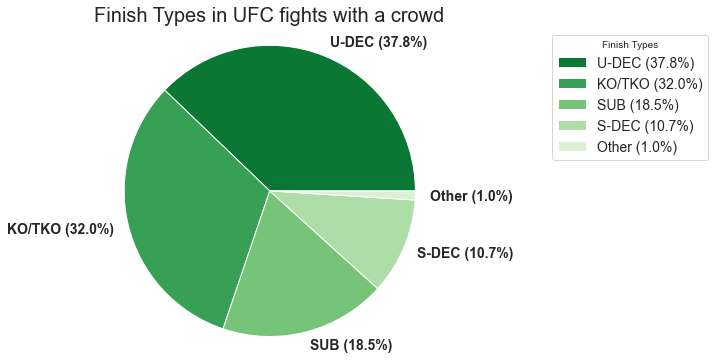

In [82]:
finish_counts_crowd = crowd_df['finish'].value_counts()

other_counts_crowd = finish_counts_crowd[finish_counts_crowd / finish_counts_crowd.sum() < 0.05].sum()
finish_counts_crowd = finish_counts_crowd[finish_counts_crowd / finish_counts_crowd.sum() >= 0.05]
finish_counts_crowd = finish_counts_crowd.append(pd.Series({'Other': other_counts_crowd}))

fig, ax = plt.subplots(figsize=(8, 6))

wedges, texts = plt.pie(finish_counts_crowd, labels=['{} ({:.1f}%)'.format(i, j/finish_counts_crowd.sum()*100) for i,j in zip(finish_counts_crowd.index, finish_counts_crowd)],
        colors=sns.color_palette("Greens_r", len(finish_counts_crowd)))
plt.setp(texts, size=14, weight="bold")
ax.set_title('Finish Types in UFC fights with a crowd', size=20)
plt.axis('equal')
plt.legend(title="Finish Types", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=14)
plt.show()

/var/folders/jq/kwdpx4p929gbkx28tlps52f80000gn/T/ipykernel_1882/3150948903.py:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  finish_counts_ncrowd = finish_counts_ncrowd.append(pd.Series({'Other': other_counts_ncrowd}))


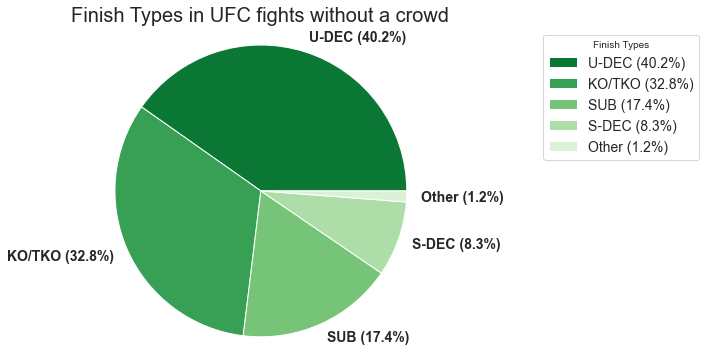

In [83]:
finish_counts_ncrowd = no_crowd_df['finish'].value_counts()

other_counts_ncrowd = finish_counts_ncrowd[finish_counts_ncrowd / finish_counts_ncrowd.sum() < 0.05].sum()
finish_counts_ncrowd = finish_counts_ncrowd[finish_counts_ncrowd / finish_counts_ncrowd.sum() >= 0.05]
finish_counts_ncrowd = finish_counts_ncrowd.append(pd.Series({'Other': other_counts_ncrowd}))

fig, ax = plt.subplots(figsize=(8, 6))

wedges, texts = plt.pie(finish_counts_ncrowd, labels=['{} ({:.1f}%)'.format(i, j/finish_counts_ncrowd.sum()*100) for i,j in zip(finish_counts_ncrowd.index, finish_counts_ncrowd)],
        colors=sns.color_palette("Greens_r", len(finish_counts_ncrowd)))
plt.setp(texts, size=14, weight="bold")
ax.set_title('Finish Types in UFC fights without a crowd', size=20)
plt.axis('equal')
plt.legend(title="Finish Types", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=14)
plt.show()